<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/Estadistica/Datos_estadisticos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de datos estadísticos

Para construir un **pipeline** adecuado en ciencia de datos, debemos tener un buen entendimiento del tipo de variables que estaremos percibiendo de los diferentes conjuntos de datos (datasets) que nos podamos encontrar....

---

Veamos ahora los [conceptos estadísticos básicos](https://towardsdatascience.com/introduction-to-statistics-in-python-6f5a8876c994) relacionados con el tipo de datos que se estudian.

Se llama **variable estadística** a cada una de las características que pueden estudiarse de la población (o de muestras).

![img](https://luminousmen.com/media/data-types-in-ds.jpeg)

1. **Cualitativas**: son variables que reflejan la propiedad o calidad de los objetos. En otras palabras, sirven como marcadores para algunas categorías. Por ejemplo, digamos que comparamos a personas que viven en un estado con personas que viven en otro estado. 

   * Nominales: Los datos nominales son aquellos que expresan con un nombre una cualidad que no tiene por qué ser ordenable (Nacionalidad, color de piel o religión).
    
   * Ordinales: Expresan una cualidad a través de un dato que es posible ordenar a través de una escala previamente definida (Nota de un examen, número de estrellas en una reseña de Google o posición en un concurso de pintura).
 
---

2. **Cuantitativas**: aquellas cuyo resultado es un número. A su vez, las hay de dos tipos:
    
   * Discretos: Los valores que pueden tomar vienen dados entre intervalos finitos de datos (pensemos en los números enteros).
    
   * Continuos: Estos datos se extraen de un intervalo de valores totalmente infinito, por lo que el número de datos diferentes que se puede obtener es ilimitado.

## Análisis de datos categóricos con Python

---

Cuando trabajamos con estadísticas, es importante reconocer los diferentes tipos de datos: numéricos (discretos y continuos) y categóricos. Los datos no son más que observaciones del mundo en el que vivimos, por tanto, los mismos pueden venir en diferentes maneras, no solo de forma numérica. 
    
![img](https://robocrop.realpython.net/?url=https%3A//files.realpython.com/media/Descriptive-Statistics-in-Python_Watermarked.fec81e9a41f9.jpg&w=960&sig=274c90a9fc73c1aafccc437c2db2c7ba12bc4c4c)

+ También vamos a utilizar la librería [pydataset](https://pypi.org/project/pydataset/), la cual nos facilita cargar los diferentes dataset para analizar.

La idea es realizar un análisis estadístico sobre los datos de los sobrevivientes a la tragedia del Titanic.

In [3]:
#Se debe recordar que para la primera ejecución de este código, 
#se debe habilidar la instalación de 'pydataset'
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=c6f60b5a50a3236a78e1d15e2cec8bc006ff7c95595f660efba49e2aa334ff12
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [4]:
# importando modulos necesarios
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pydataset import data
%matplotlib notebook
#Añadir la siguiente línea de código
%matplotlib inline 

# importando dataset
titanic = data('titanic')
# ver primeros 10 registros
titanic.head(10)

initiated datasets repo at: /root/.pydataset/


,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


La función [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) se utiliza para ver algunos detalles estadísticos básicos como percentiles, media, std, etc. de un DataFrame o una serie de valores numéricos. Cuando este método se aplica a una serie de Strings, devuelve una salida diferente que se muestra en los ejemplos a continuación.

In [11]:
titanic.info

<bound method DataFrame.info of           class     age    sex survived
1     1st class  adults    man      yes
2     1st class  adults    man      yes
3     1st class  adults    man      yes
4     1st class  adults    man      yes
5     1st class  adults    man      yes
...         ...     ...    ...      ...
1312  3rd class   child  women       no
1313  3rd class   child  women       no
1314  3rd class   child  women       no
1315  3rd class   child  women       no
1316  3rd class   child  women       no

[1316 rows x 4 columns]>

In [12]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


Para hacernos una *imagen de los datos*, lo primero que tenemos que hacer es agruparlos. 

Al armar diferentes grupos nos vamos acercando a la comprensión de los datos.

**La idea es ir agrupando las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías**. 

Para los *datos categóricos*, agrupar es fácil; simplemente debemos contar el número de ítems que corresponden a cada categoría y juntarlos. 

Una forma en la que podemos agrupar nuestro dataset del Titanic es contando las diferentes clases de pasajeros. Podemos organizar estos conteos en una *tabla de frecuencia*, que registra los totales y los nombres de las categorías utilizando la función [**value_counts**](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) que nos proporciona Pandas del siguiente modo:

In [16]:
# tabla de frecuencia de clases de pasajeros
#pd.value_counts(titanic['class'])

titanic['class'].value_counts(normalize=True).mul(100).round(2)

3rd class    53.65
1st class    24.70
2nd class    21.66
Name: class, dtype: float64

Una tabla de **frecuencia relativa** muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los casos se distribuyen a través de las categorías. 

De esta manera, ellas describen la distribución de una variable categórica, ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [17]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

3rd class    53.647416
1st class    24.696049
2nd class    21.656535
Name: class, dtype: float64

### Gráficos de pastel y barras

---

El gráfico de barras nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros datos. 

La altura de cada barra muestra el recuento de su categoría. Los barras tienen el mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. 

De esta forma, podemos ver fácilmente que había más del doble de pasajeros de tercera clase, que de primera o segunda clase. 

Los gráficos de barras hacen que este tipo de comparaciones sean fáciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el método [**plt.plot()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) dentro de un **DataFrame** de **Pandas** y guardando esa imagen con [**plt.savefig()**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

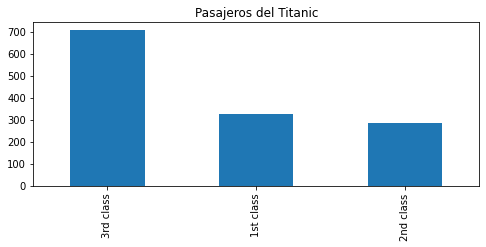

In [19]:
# Gráfico de barras de pasajeros del Titanic
# Se puede añadir %matplotlib inline
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (8,3)
plot = titanic['class'].value_counts().plot(kind='bar', title='Pasajeros del Titanic')
plt.savefig("figure.png", bbox_inches='tight')      #guardar la figura para descargar 

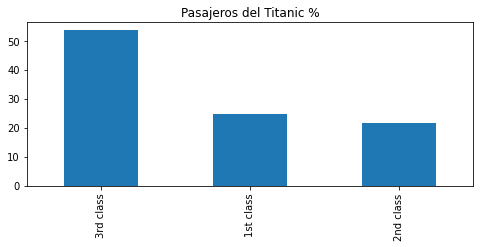

In [21]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts() / len(titanic['class'])).plot(kind='bar', title='Pasajeros del Titanic %')
plot

Por otro lado, el gráfico de pastel muestra el total de casos proporcionales a la fracción que cada categoría representa. 

Los gráfico de pastel dan una impresión rápida de cómo todo un grupo se divide en grupos más pequeños. Lo podríamos graficar del siguiente modo, también utilizando el método plot:

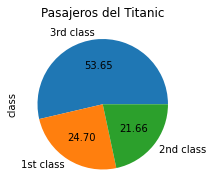

In [24]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(3, 3),
                                            title='Pasajeros del Titanic')

## Relacionando variables categóricas¶

---

Al analizar la tragedia del Titanic, una de las preguntas que podríamos hacer es **¿existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia?**. 

Para poder responder a esta pregunta, vamos a necesitar analizar a las variables **class** y **survived** de nuestro dataset en forma conjunta. 

---

Una buena forma de analizar dos variables categóricas en forma conjunta, es agrupar los recuentos en una tabla de doble entrada; este tipo de tablas se conocen en estadística con el nombre de tabla de contingencia. Veamos como podemos crear esta tabla utilizando la función **crosstab** de **Pandas**.

In [25]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


In [26]:
#Con esto tambien podemos hacer la taba de ocntigencia de froma mas rebuscada

test = titanic.groupby('survived')['class'].value_counts().unstack()
test['All'] = test.sum(axis=1)
test.loc['All']= test.sum()
test

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


Los márgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de frecuencia de la clase de pasajeros. 

La columna derecha de la tabla es la distribución de frecuencia de la variable supervivencia. 

Cuando se presenta la información de este modo, cada celda de cada uno de los márgenes de la tabla representa la *distribución marginal* de esa variable en particular. 


Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos variables categóricas, en este caso **class** y **survived**.

---

Al igual de como habíamos visto con las tablas de frecuencia, también nos podría ser útil representar a las tablas de contingencia con porcentajes relativos; esto lo podríamos realizar utilizando el método apply del siguiente modo:

In [33]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['class'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1).round(2)

class,1st class,2nd class,3rd class,All
survived,,,,
no,9.27,12.69,40.12,62.08
yes,15.43,8.97,13.53,37.92
All,24.70,21.66,53.65,100.00


Con esta tabla podemos ver fácilmente que solo el 37.91% de los pasajeros sobrevivió a la tragedia y que este 37% se compone de la siguiente forma: del total de pasajeros sobrevivió un 15.42% de pasajeros que eran de primera clase, un 8.97% que eran de segunda clase y un 13.52% que eran pasajeros de tercera clase.

---

Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir según la clase de pasajero, podría ser más útil armar la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

In [34]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
testing = pd.crosstab(index=titanic['survived'], 
            columns=titanic['class']).apply(lambda r: r/r.sum() *100, 
                                            axis=1).round(3)
testing

class,1st class,2nd class,3rd class
survived,,,
no,14.933,20.441,64.627
yes,40.681,23.647,35.671


Aquí podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 40.68% correspondían a primera clase, el 35.67% a tercera clase y el 23.65% a segunda clase. Por tanto podríamos inferir que los pasajeros de primera clase tenían más posibilidades de sobrevivir.

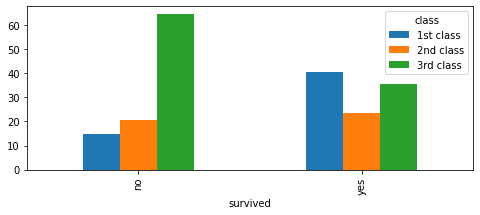

In [38]:
# Gráfico de barras de sobreviviviente segun clase
plot = testing.plot(kind='bar')

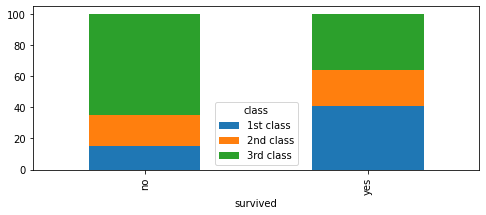

In [37]:
# APILADO DE GRAFICAS
# Gráfico de barras de sobreviviviente segun clase
plot = testing.plot(kind='bar', stacked=True)

# Sección de practica
Aquí, intenta calcular las tablas anteriores sin utilizar la función de
crosstab de pandas. Para eso, pudieras auxiliarte de groupby y value_counts. Échale coco!

In [ ]:
# Tu codigo aqui
<#Completa>

## Analizando datos cuantitativos con Python

---

Para los ejemplos de esta sección, vamos a trabajar con el dataset **faithful**, el cual consiste en una colección de observaciones sobre las erupciones del géiser Old Faithful en el parque nacional Yellowstone de los Estados Unidos. La información que contiene este dataset es la siguiente:


In [39]:
faithful = data('faithful')
faithful

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90
271,1.817,46


In [40]:
faithful.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


## Histogramas

---

Para las variables cuantitativas, a diferencia de lo que pasaba con las variables categóricas, no existe una forma obvia de agrupar los datos; por tal motivo lo que se suele hacer es, dividir los posibles valores en diferentes contenedores del mismo tamaño y luego contar el número de casos que cae dentro de cada uno de los contenedores. 


Estos contenedores junto con sus recuentos, nos proporcionan una imagen de la distribución de la variable cuantitativa y constituyen la base para poder graficar el histograma. 


Para construir el gráfico, simplemente debemos representar a los recuentos como barras y graficarlas contra los valores de cada uno de los contenedores.


**Con Python podemos representar fácilmente el histograma de la variable eruptions utilizando el método *hist* del DataFrame de *Pandas* del siguiente modo**:

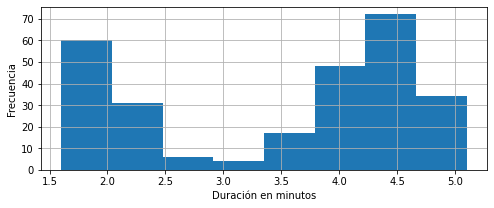

In [43]:
# histograma duración de erupciones con 8 barras
faithful['eruptions'].hist(bins=8) 
plt.xlabel("Duración en minutos")
plt.ylabel("Frecuencia")
plt.show()

## Distribución de frecuencia
---

Un tema íntimamente relacionado con los histogramas son las tablas de distribución de frecuencia, en definitiva los histogramas no son más que gráficos de tablas de distribución de frecuencia. La distribución de frecuencia de una variable cuantitativa consiste en un resumen de la ocurrencia de un dato dentro de una colección de categorías que no se superponen.

Estas categorías las vamos a poder armar según nuestra conveniencia y lo que queramos analizar. Por ejemplo si quisiéramos armar la distribución de frecuencia de la variable eruptions podríamos realizar las siguiente manipulaciones con Pandas:

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.
contenedores = np.arange(1.5, 6., 0.5)     # INTERVALO DE 1.5 A 6 EN AUMENTOS DE 0.5

# luego cortamos los datos en cada contenedor 
frec = pd.cut(faithful['eruptions'], contenedores)   #HACER LOS BINDS A MANO... COMPARA CADA VALOR CON EL LINTERVALO PARA DECIRNOS DONDE ESTA CAYENDO EL NUMERO

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)        #CONTABILIZA LOS ELEMENTOS EN CADA CONTENEDOR O AGRUPACIÓN
tabla_frec

(4.0, 4.5]    75
(1.5, 2.0]    55
(4.5, 5.0]    54
(2.0, 2.5]    37
(3.5, 4.0]    34
(3.0, 3.5]     9
(2.5, 3.0]     5
(5.0, 5.5]     3
Name: eruptions, dtype: int64

Como nos nuestra esta tabla de distribución de frecuencia, la duración que más veces ocurre para las erupciones, se encuentran en el rango de 4 a 4.5 minutos.


## Diagrama de dispersión
---

Hasta aquí venimos graficando únicamente una sola variable cuantitativa pero **¿qué pasa si queremos trabajar con dos variables?** Para estos casos existe el diagrama de dispersión. 

El *diagrama de dispersión* es una de las formas más comunes que existen para visualizar datos y constituye una de las mejores forma de observar relaciones entre dos variables cuantitativas. 

Veremos que se puede observar un montón de cosas por el solo hecho de mirar. 

---
Este diagrama es una de las mejores formas de visualizar las asociaciones que pueden existir entre nuestros datos.

El diagrama de dispersión empareja los valores de dos variables cuantitativas y luego los representa como puntos geométricos dentro de un diagrama cartesiano. 

Por ejemplo, volviendo a nuestro dataset faithful, podríamos emparejar a las variables eruptions y waiting en la misma observación como coordenadas (x, y) y luego graficarlas en el eje cartesiano. 

Con la ayuda de Python podríamos generar el diagrama de dispersión del siguiente modo:

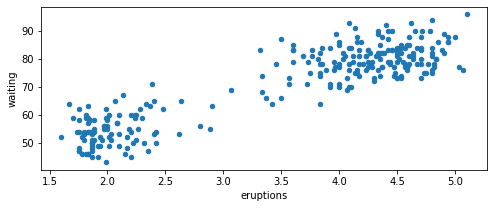

In [44]:
# diagrama de dispersión
disp= faithful.plot(kind='scatter', x='eruptions', y='waiting')